In [1]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from numpy import std, mean
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.experimental import enable_hist_gradient_boosting
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

/opt/homebrew/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
# Read the data
df = pd.read_csv('Data/colon-dataset-processed.csv')

In [3]:
#target variable
y=df['Class']

#features
X=df.drop(['Class'], axis=1)

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [4]:
# just to understand the data
n_samples, n_features = X.shape
print(f"The dataset consists of {n_samples} samples and {n_features} features")

The dataset consists of 115 samples and 16 features


In [5]:
# define the model
import sklearn
OG_model = HistGradientBoostingClassifier()
# fit the model on the whole dataset
OG_model.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [6]:
#evaluate the model
y_pred = OG_model.predict(X_test)
OG_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (OG_accuracy * 100.0))

Accuracy: 78.26%


In [7]:
#classificatio report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   diagnosed       0.83      0.77      0.80        13
     healthy       0.73      0.80      0.76        10

    accuracy                           0.78        23
   macro avg       0.78      0.78      0.78        23
weighted avg       0.79      0.78      0.78        23



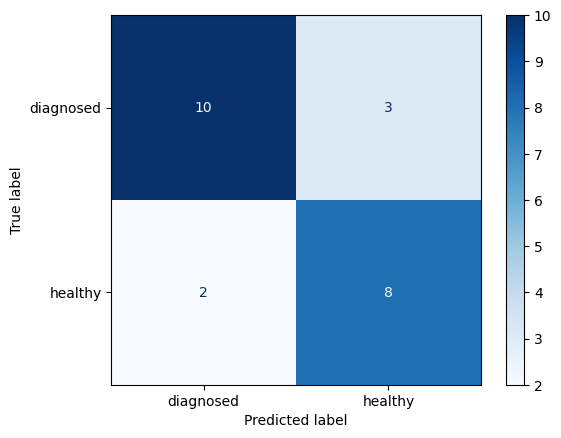

In [9]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=OG_model.classes_)
disp.plot(cmap=plt.cm.Blues)

In [11]:
#grip search

# define models and parameters
model = HistGradientBoostingClassifier()

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'max_iter': [50, 100, 200],
    'max_leaf_nodes': [15, 31, 63, 127],
    'min_samples_leaf': [5, 10, 20],
    'l2_regularization': [0.0, 0.1, 1.0]
}

cv=KFold(n_splits=4, random_state=1, shuffle=True)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid, n_jobs=-1, 
                    cv=cv, 
                    scoring='accuracy',
                    error_score=0)

grid_result = grid.fit(X_train, y_train)

print(f'Best Score: {grid_result.best_score_} for {grid_result.best_params_}')

best_model = grid_result.best_estimator_
best_model.fit(X_train, y_train)
best_y_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_y_pred)
print("Accuracy: %.2f%%" % (best_accuracy * 100.0))

Best Score: 0.8913043478260869 for {'l2_regularization': 0.0, 'learning_rate': 0.01, 'max_iter': 200, 'max_leaf_nodes': 15, 'min_samples_leaf': 10}
Accuracy: 78.26%


<h3> Oversampling </h3>

In [12]:
#Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Check distribution after SMOTE
print('Resampled dataset distribution %s' % Counter(y_res))

Resampled dataset distribution Counter({'healthy': 65, 'diagnosed': 65})


In [13]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res, y_res, test_size=0.2, random_state=123)

# define the model

over_model = HistGradientBoostingClassifier()

In [14]:
# fit the model on the train dataset
over_model.fit(X_train1, y_train1)

HistGradientBoostingClassifier()

In [15]:
#evaluate the model
y_pred_over = over_model.predict(X_test1)
over_accuracy = accuracy_score(y_test1, y_pred_over)
print("Accuracy: %.2f%%" % (over_accuracy * 100.0))

Accuracy: 84.62%


In [16]:
#classification report
print(classification_report(y_test1, y_pred_over))

              precision    recall  f1-score   support

   diagnosed       0.82      0.82      0.82        11
     healthy       0.87      0.87      0.87        15

    accuracy                           0.85        26
   macro avg       0.84      0.84      0.84        26
weighted avg       0.85      0.85      0.85        26



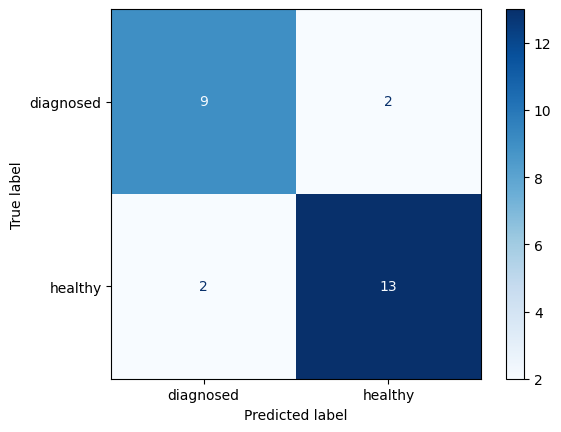

In [18]:
#confusion matrix
cm = confusion_matrix(y_test1, y_pred_over)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=over_model.classes_)
disp.plot(cmap=plt.cm.Blues)

In [19]:
#grip search

# define models and parameters
model1 = HistGradientBoostingClassifier()

cv=KFold(n_splits=10, random_state=1, shuffle=True)

grid1 = GridSearchCV(estimator=model1,
                    param_grid=param_grid, n_jobs=-1, 
                    cv=cv, 
                    scoring='accuracy',
                    error_score=0)

grid_result1 = grid1.fit(X_train1, y_train1)

print(f'Best Score: {grid_result.best_score_} for {grid_result.best_params_}')

best_over_model= grid1.best_estimator_
y_pred2 = best_over_model.predict(X_test1)

#evaluate the model
best_over_accuracy = accuracy_score(y_test1, y_pred2)
print("Accuracy: %.2f%%" % (best_over_accuracy * 100.0))

Best Score: 0.8913043478260869 for {'l2_regularization': 0.0, 'learning_rate': 0.01, 'max_iter': 200, 'max_leaf_nodes': 15, 'min_samples_leaf': 10}
Accuracy: 84.62%


<h3>Undersampling</h3>

In [20]:
#apply under sampling
under = RandomUnderSampler(random_state=42)
X_under, y_under = under.fit_resample(X, y)

# Check distribution after under sampling
print('Resampled dataset distribution %s' % Counter(y_under))

Resampled dataset distribution Counter({'diagnosed': 50, 'healthy': 50})


In [21]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_under, y_under, test_size=0.2, random_state=123)

# define the model
under_model = HistGradientBoostingClassifier()

In [22]:
under_model.fit(X_train2, y_train2)

HistGradientBoostingClassifier()

In [23]:
#evaluate the model
y_pred_under = under_model.predict(X_test2)
under_accuracy = accuracy_score(y_test2, y_pred_under)
print("Accuracy: %.2f%%" % (under_accuracy * 100.0))

Accuracy: 95.00%


In [24]:
#classification report
print(classification_report(y_test2, y_pred_under))

              precision    recall  f1-score   support

   diagnosed       1.00      0.89      0.94         9
     healthy       0.92      1.00      0.96        11

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



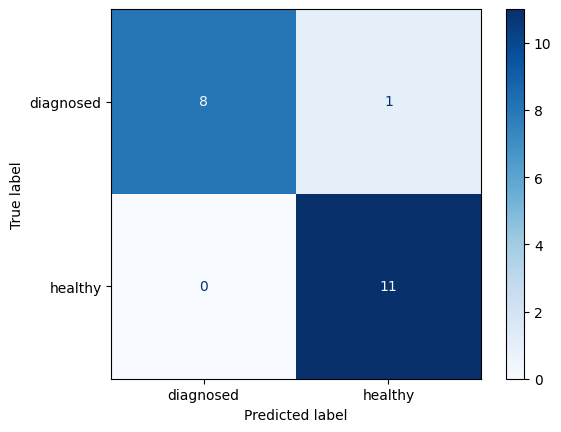

In [25]:
#confusion matrix
cm = confusion_matrix(y_test2, y_pred_under)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=under_model.classes_)
disp.plot(cmap=plt.cm.Blues)

In [26]:
#grip search

# define models and parameters
model2 = HistGradientBoostingClassifier()

cv=KFold(n_splits=5, random_state=1, shuffle=True)

grid2 = GridSearchCV(estimator=model2,
                    param_grid=param_grid, n_jobs=-1, 
                    cv=cv, 
                    scoring='accuracy',
                    error_score=0)

grid_result2 = grid2.fit(X_train2, y_train2)

print(f'Best Score: {grid_result.best_score_} for {grid_result.best_params_}')

best_under_model= grid2.best_estimator_
y_pred3 = best_under_model.predict(X_test2)

#evaluate the model
best_under_accuracy = accuracy_score(y_test2, y_pred3)
print("Accuracy: %.2f%%" % (best_under_accuracy * 100.0))

Best Score: 0.8913043478260869 for {'l2_regularization': 0.0, 'learning_rate': 0.01, 'max_iter': 200, 'max_leaf_nodes': 15, 'min_samples_leaf': 10}
Accuracy: 85.00%
